$\textbf{Introduction}$

This is a study of automobile demand, as a function of disposable income, US mortage rates and the rate of change of automobile prices.

First lets read in the data from the spread sheets.

In [10]:
# ! pip install --upgrade pandas

Requirement already up-to-date: pandas in c:\users\apostlepaul1906\anaconda3\lib\site-packages (1.3.5)


In [1]:

import pandas as pd
import os, sys, re, datetime
from datetime import datetime 
import time
from datetime import datetime, date, time, timedelta

df1 = pd.read_excel('AutoPrices.xls', header=0, names=['observation_date','CUSR0000SETA01'],
                   parse_dates=['observation_date']).iloc[10:]
df1.set_index('observation_date', inplace=True)
df1.index= pd.to_datetime(df1.index)

df2 = pd.read_excel('DAUPSA.xls', header=0, names=['observation_date','DAUPSA'],
                   parse_dates=['observation_date']).iloc[10:]
df2.set_index('observation_date', inplace=True)
df2.index= pd.to_datetime(df2.index)

df3 = pd.read_excel('DisposIncome.xls', header=0, names=['observation_date','DSPIC96'],
                    parse_dates=['observation_date']).iloc[10:]
df3.set_index('observation_date', inplace=True)
df3.index= pd.to_datetime(df3.index)



df4 = pd.read_excel('MORTGAGE15US.xls', header=0, names=['observation_date','MORTGAGE15US'], 
                    parse_dates=['observation_date']).iloc[10:]
df4.set_index('observation_date', inplace=True)
df4.index= pd.to_datetime(df4.index)
df4 = df4.resample('M').last()
df4.index=df4.index+timedelta(days=1)


In [2]:
df1_2 = pd.merge(df1, df2, left_index=True, right_index=True)
df1_2_3 =pd.merge(df1_2, df3, left_index=True, right_index=True)
df =pd.merge(df1_2_3, df4, left_index=True, right_index=True)
df

,CUSR0000SETA01,DAUPSA,DSPIC96,MORTGAGE15US
observation_date,,,,
1993-01-01,130.9,512.9,7237.6,7.68
1993-02-01,131.1,503.8,7271.8,7.37
1993-03-01,131.3,498.1,7249.2,7.02
1993-04-01,131.7,510.2,7286.8,7.01
1993-05-01,132.2,512.8,7276.3,6.91
...,...,...,...,...
2021-05-01,151.693,128.1,15598.1,2.31
2021-06-01,154.68,120.3,15517.7,2.27
2021-07-01,157.34,142.2,15617.6,2.34


In [3]:
df = df.rename({'CUSR0000SETA01':'AutoPrice', 'DAUPSA':'AutoProd','DSPIC96':'DisIncome', 'MORTGAGE15US':'MortRate'}, axis=1)
df

,AutoPrice,AutoProd,DisIncome,MortRate
observation_date,,,,
1993-01-01,130.9,512.9,7237.6,7.68
1993-02-01,131.1,503.8,7271.8,7.37
1993-03-01,131.3,498.1,7249.2,7.02
1993-04-01,131.7,510.2,7286.8,7.01
1993-05-01,132.2,512.8,7276.3,6.91
...,...,...,...,...
2021-05-01,151.693,128.1,15598.1,2.31
2021-06-01,154.68,120.3,15517.7,2.27
2021-07-01,157.34,142.2,15617.6,2.34


In [4]:
df = df.astype(dtype={'AutoPrice':float,'AutoProd':float,'DisIncome':float, 'MortRate':float})

In [5]:
df.head(20)

,AutoPrice,AutoProd,DisIncome,MortRate
observation_date,,,,
1993-01-01,130.9,512.9,7237.6,7.68
1993-02-01,131.1,503.8,7271.8,7.37
1993-03-01,131.3,498.1,7249.2,7.02
1993-04-01,131.7,510.2,7286.8,7.01
1993-05-01,132.2,512.8,7276.3,6.91
1993-06-01,132.3,489.5,7262.9,6.99
1993-07-01,132.9,468.1,7281.2,6.84
1993-08-01,133.4,457.1,7291.8,6.75
1993-09-01,133.6,441.7,7271.9,6.49


- lets start from 94


In [6]:
df_cur = df.iloc[12:] # shift one year later
df_prev = df.iloc[:-12] 
df.shape, df_cur.shape, df_prev.shape

((345, 4), (333, 4), (333, 4))

Now let's pick out the arrays and look at the data, we see the deep drop in Mortgage Rates after 2010

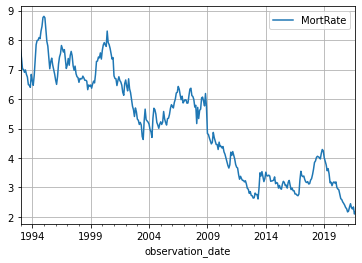

In [7]:
#!pip install --upgrade matplotlib
import matplotlib.pyplot as plt

df.plot(y='MortRate')
plt.grid(True)

## Data Transformation

In [8]:
import numpy as np
df_transformed = pd.DataFrame(columns=df.columns)
for col in df.columns:
    df_transformed[col] =  np.log(df_cur[col].values) - np.log(df_prev[col].values)
    print(df_cur[col].values.shape)
df_transformed.index = df_cur.index

(333,)
(333,)
(333,)
(333,)


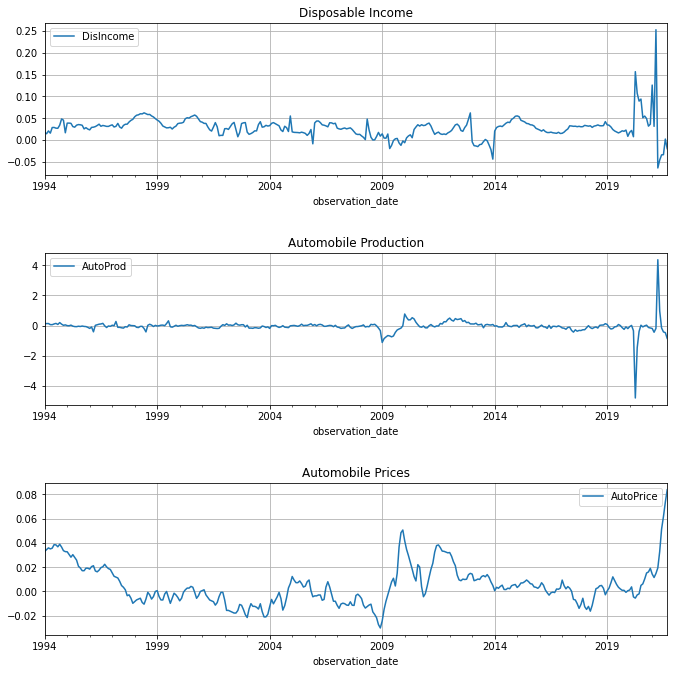

In [9]:
import matplotlib.pyplot as plt
#!pip install tensorflow
#import tensorflow as tf
fig,axes = plt.subplots(nrows=3,figsize=(10,10))
ax = axes[0]
df_transformed.plot(ax=ax,title='Disposable Income', y='DisIncome')
ax.grid(True)
ax = axes[1]
df_transformed.plot(ax=ax,y='AutoProd', title='Automobile Production')
ax.grid(True)
ax = axes[2]
df_transformed.plot(ax=ax,y='AutoPrice', title='Automobile Prices')
ax.grid(True)
fig.tight_layout(pad=3.0)


In [10]:
 df_transformed.iloc[12:]

,AutoPrice,AutoProd,DisIncome,MortRate
observation_date,,,,
1995-01-01,0.032718,-0.001736,0.038708,0.284283
1995-02-01,0.030481,-0.012928,0.038805,0.303020
1995-03-01,0.028253,0.031404,0.038250,0.204141
1995-04-01,0.030327,-0.036327,0.030809,0.086555
1995-05-01,0.028069,-0.065408,0.029413,-0.006390
...,...,...,...,...
2021-05-01,0.032890,0.969188,-0.046038,-0.181600
2021-06-01,0.051273,-0.156641,-0.034182,-0.143394
2021-07-01,0.061663,-0.418044,-0.033639,-0.101507


In [11]:
y = df_transformed.iloc[12:]['AutoProd']
normalized_y=(y-y.min())/(y.max()-y.min()) #[0,1]

x = df_transformed.iloc[:-12]
normalized_x=(x-x.min())/(x.max()-x.min())

In [12]:
ry = len(y)
ry

321

Lets do a split of in and out of sample with ols.  Let 85 percent of the sample be for estimaition and the last for the final test of root mean squared error.  He calculate the Hanan-Quinn information criteria for the insample performance with zero lags.

In [13]:
import statsmodels.api as sm
nn = 85*len(y)//100

xin = x.iloc[:nn]
yin = y.iloc[:nn]

xout = x.iloc[nn:]
yout = y.iloc[nn:]

mod = sm.OLS(yin.values, xin.values)
res = mod.fit()

B  = res.params
print(x.columns),
print(B)

yhat_in = np.dot(xin.values, np.expand_dims(B,axis=1))
ehat = yin.values - np.squeeze(yhat_in)
sse = np.dot(ehat.T, ehat)/nn;
hqif =  -2 * np.log(sse) + 2 *len(B)*np.log(np.log(len(xin)))
hqif

Index(['AutoPrice', 'AutoProd', 'DisIncome', 'MortRate'], dtype='object')
[ 3.74363934 -0.36630907 -1.40972822 -0.170074  ]


20.564703774492784

Now lets try the in sample with  lags from zero to 42 to see which lag structure is better


We have the aif bif and the hqif.  They show us that the best, in terms of lowest value, is for zero lags. 

In [14]:
from statsmodels.tsa.tsatools import lagmat
lags = [0,1,2,3,4,5,6,12,24,36,42];
print('lag, hqif, aif, bif')
for i, lag in enumerate(lags):
    
    x11 = lagmat(xin,maxlag=lag, trim="forward", original='in');
    #print('x11',x11.shape)
    
    y11 = yin.iloc[lag:]
    x21 = x11[lag:]
    Y = y11; X = x21;
              
    mod = sm.OLS(X, Y.values)
    res = mod.fit()
    B  = res.params
    
    yhat_in = np.dot(X, B.reshape(-1,1))
    ehat = Y.values - np.squeeze(yhat_in)
    sse = np.dot(ehat.T, ehat)/nn;
    hqif =  -2 * np.log(sse) + 2 *len(B)*np.log(np.log(len(X)))
    aif = -2 * np.log(sse) + 2 *len(B)*np.log(len(X));
    bif  = -2 * np.log(sse) + 2 *len(B)*len(X);
    print('{}: {:.2f}, {:.2f}, {:.2f}'.format(lag,hqif,aif,bif))
#     end
#     hqif1
#     aif1
#     bif1


lag, hqif, aif, bif
0: 9.97, 17.74, 550.53
1: 9.89, 17.65, 548.45
2: 9.77, 17.52, 546.32
3: 9.66, 17.41, 544.22
4: 9.59, 17.33, 542.14
5: 9.61, 17.34, 540.16
6: 9.69, 17.42, 538.25
12: 9.11, 16.80, 525.68
24: 7.11, 14.72, 499.69
36: 6.05, 13.59, 474.66
42: 5.98, 13.47, 462.59


We do the regression for the insample and do the out of sample by multiplying the Bols to the out of sample xout to get 
the prediction yhat_out.  We calculate the error and the Root mean squared error.  We get the value of 1.02.

In [16]:
  
mod = sm.OLS(yin.values, xin.values)
res = mod.fit()

B  = res.params

yhat_out = np.dot(xout.values, np.expand_dims(B,axis=1))
error_out = yout.values - np.squeeze(yhat_out)
sse = np.sum(error_out**2)/len(error_out)
rmsq = sse**.5
rmsq


0.8722451541683682

In [58]:
lag_best = 4
xmatrix = lagmat(x,maxlag=lag_best, trim="forward", original='in')
xmatrix2  = xmatrix[lag:,:]
[rx, cx] = xmatrix2.shape
constant_term = np.ones((rx,1))
xmatrix1 = np.hstack((xmatrix2, constant_term))

yadj = y[lag:]
xmatrix1_in = xmatrix1[:nn,:]
yadj_in = yadj[:nn]
xmatrix1_out = xmatrix1[nn:,:]
yadj_out = yadj[nn:]
mod = sm.OLS(yadj_in, xmatrix1_in)
res = mod.fit()
B  = res.params
yhat_out = np.dot(xmatrix1_out, np.expand_dims(B,axis=1))
error_out = yadj_out - np.squeeze(yhat_out)


In [127]:
sse = np.mean((error_out ** 2))
rmse_ols = np.sqrt(sse)
rmse_ols

0.9923816077777569

In [176]:
ny = len(yadj)
WL = 100;
TERM = ny - (WL+1)
yadj_rw = np.array(yadj)
xmatrix1_rw = np.array(xmatrix1)
Yhat_out_rw = np.zeros((ny-WL,1))
Error_out_rw = np.zeros((ny-WL,1))


In [178]:
for i in range(1,TERM):
    WLL = WL+(i-1)
    WLLp = WLL +1
    yy = yadj_rw[i:WLL]
    xx = xmatrix1_rw[i:WLL,:]
    xjunk = xmatrix1_rw[WLLp,:]
    mod = sm.OLS(yy, xx)
    res = mod.fit()
    B  = res.params
    Yhat_out_rw[i] = np.dot(xjunk,B)
    Error_out_rw[i] = y[WLLp] - Yhat_out_rw[i]

    
    

In [181]:
sse =  np.mean((Error_out_rw)**2)
rmsq_ols_rw = np.sqrt(sse)
print(rmsq_ols_rw)

0.5924946668347997


Now lets see if the simple neural network does better out of sample. We feed in the same in and out of sample x and y variables as well as a simple neural net structure

In [172]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
#X, y = make_regression(n_samples=200, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=100000, hidden_layer_sizes =(24,), alpha=.1, solver='lbfgs', 
                    activation='logistic').fit(xmatrix1_in, yadj_in)

yhat_out_nn = regr.predict(xmatrix1_out)

Score = regr.score(xmatrix1_out, yadj_out)
Score

0.4689172806602805

In [173]:

error_nn = yadj_out - yhat_out_nn
sse_nn = np.mean((error_nn **2))
rmsq_nn = np.sqrt(sse_nn)
rmsq_nn

1.2204110484579493

We see that the simple neural net delivered a better out of sample root mean squared error than the ols. A reduction in the root mean squared error from .1644 to 0.09.   Now lets do a third order polynomial expansion.  You see that the polynomial expansion does even worse out of sample than the linear least squares. And much worse than the simple neural net.

In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_feat = PolynomialFeatures(degree=2)
xmatrix2p = poly_feat.fit_transform(xmatrix2)
xmatrix2p1 =  np.hstack((xmatrix2p,constant_term))
xmatrix2p1_in = xmatrix2p1[:nn,:]
xmatrix2p1_out = xmatrix2p1[nn:,:]
mod = sm.OLS(yadj_in, xmatrix2p1_in)
res = mod.fit()
B  = res.params
yhat_out_poly = np.dot(xmatrix2p1_out, np.expand_dims(B,axis=1))
error_out_poly = yadj_out - np.squeeze(yhat_out_poly)
sse = np.mean((error_out_poly)**2)
rmsq_poly = np.sqrt(sse)
rmsq_poly



97.79451572921882

In [241]:
rx,cx = xmatrix1.shape
HOR = rx - WL
Error_out_nn_rw = np.zeros((HOR,1))
yhat_out_nn_rw = np.zeros((HOR,1))
for i in range(1,TERM):
    WLL = WL+(i-1)
    WLLp = WLL +1
    yy = yadj_rw[i:WLL]
    xx = xmatrix1_rw[i:WLL,:]
    xjunk = xmatrix1_rw[WLLp,:]
    regr = MLPRegressor(random_state=1, max_iter=100000, hidden_layer_sizes =(20,10,6,5,4,3,2), alpha=.5, solver='adam', 
                    activation='logistic',warm_start=True).fit(xx, yy)
    xnew = xjunk.reshape(1,cx)
    yhat_out_nn_rw[i,:] = regr.predict(xnew)
    Error_out_nn_rw[i] = yadj_rw[WLLp] - yhat_out_nn_rw[i]

In [244]:
sse = np.mean((Error_out_nn_rw)**2)
rmsq_rw_nn = np.sqrt(sse)
print(rmsq_rw_nn, rmsq_ols_rw)

0.5865225637612167 0.5924946668347997


In [245]:
weights = regr.coefs_
biases = regr.intercepts_

weights_array = np.concatenate([w.flatten() for w in weights])
biases_array = np.concatenate([b.flatten() for b in biases])

parameters = np.concatenate([weights_array, biases_array])

non_zero_weights_biases = np.count_nonzero(parameters)
print(parameters.shape, non_zero_weights_biases)



(801,) 801


In [247]:
df.index = pd.to_datetime(df.index)
date_index = df.index
ry = yadj_rw.shape
ry
print(date_index.shape, Error_out_nn_rw.shape, HOR, ry)


(345,) (179, 1) 179 (279,)


100

(179,) (179, 1)


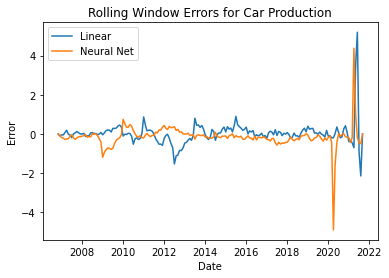

In [263]:
date_index1 = date_index[105:]
rd = date_index1.shape
re = Error_out_nn_rw.shape


start = tuple(rd - re for rd, re in zip(rd, re))
start1 = int(start[0])

date_index2 = date_index1[start1:]
rrd = date_index2.shape
print(rrd, Error_out_nn_rw.shape)
plt.plot(date_index2, Error_out_rw, label='Linear')
plt.plot(date_index2, Error_out_nn_rw, label='Neural Net')
plt.xlabel('Date')
plt.ylabel('Error')
plt.title('Rolling Window Errors for Car Production')
plt.legend()
plt.show()

In [228]:
import tensorflow as tf

def create_mlp_model(input_dim, l1_reg):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(3*rx, input_dim=input_dim, activation='tanh',
                                    kernel_regularizer=tf.keras.regularizers.l1(l1_reg)))
    model.add(tf.keras.layers.Dense(2*rx, activation='tanh',
                                    kernel_regularizer=tf.keras.regularizers.l1(l1_reg)))
    model.add(tf.keras.layers.Dense(rx, activation='tanh',
                                    kernel_regularizer=tf.keras.regularizers.l1(l1_reg)))
    model.add(tf.keras.layers.Dense(1))
    return model

input_dim = X.shape[1]
mlp = create_mlp_model(input_dim, l1_reg=0.2)
mlp.compile(optimizer='Adam', loss='mean_squared_error')

history = mlp.fit(X, Y, epochs=1000, batch_size=32, validation_data=(Xout, Yout))

<AxesSubplot:title={'center':'Automobile Prices'}, xlabel='observation_date'>

In [ ]:
Yhat_out= mlp.predict(Xout)

Yhat_out = Yhat_out.ravel()
Yout = np.array(Yout)


ERROR = Yout - Yhat_out


In [ ]:
[Bols b_lasso]

In [ ]:
yhat_lasso = xout * b_lasso;
ehat_lasso = yout - yhat_lasso;
rmse_lasso = (ehat_lasso'*ehat_lasso/length(yhat_lasso))^.5;
rmse_lasso


In [ ]:
help NNFFfun


In [ ]:
size(X)


In [ ]:
ceil(.85*length(X))

In [ ]:
Xout = X(193:end,:);
yhat_ols = Xout * B1;
error_ols = Y(193:end,:)-yhat_ols;
yhat_lasso = Xout *b_lasso;
error_lasso = Y(193:end,:)-yhat_ols;
rmse_ols = (error_ols'*error_ols/length(Xout))^.5;
rmse_lasso = (error_lasso'*error_lasso/length(Xout))^.5;

In [ ]:
[rmse_ols rmse_lasso]